#### Import required package

In [1]:
from __future__ import division
import pyximport
import numpy as np
pyximport.install(setup_args={
                              "script_args":["--compiler=mingw32"],
                              "include_dirs":np.get_include()
                            },
                  language_level=3,
                  reload_support=True)
import ca_utils_cy                           # cythonized python module
# import ca_utils                            # unoptimized python module
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (5,5)

#### Initilisation Model 1 (Visualisation)

In [20]:
N           = 50                           # lattice size
p1, p2, p3  = 0.95, 0.5, 0.1                # p for visualisation
S0, I0, R0  = 0.05, 0.9, 0.05               # initial fraction of S, I, R
equistep    = 100                           # equilibrate sweep
calcstep    = 10000                         # measurement sweep
factor      = int(calcstep/10)              # because of 'if (j%10 == 0):' in 'analyse' fn

p = [p1, p2, p3]
fraction = [S0, I0, R0]

np.random.seed(0)
sir_model = ca_utils_cy.SIR(N, fraction, p, factor, equistep, calcstep)


<font color='orange'>Absorbing State ( S only )</font>
    - p1, p2, p3  = 0.01, 0.5, 0.1 
<font color='cyan'>Absorbing Steady State ( S and I )</font>
    - p1, p2, p3  = 0.05, 0.5, 0.0
<font color='green'>Dynamic Equilibrium ( Cyclic Permutation if S, I and R )</font>
    - p1, p2, p3  = 0.8, 0.8, 0.8
<font color='grey'>Wave ( Spreading of Infection )</font>
    - p1, p2, p3  = 0.95, 0.5, 0.1 

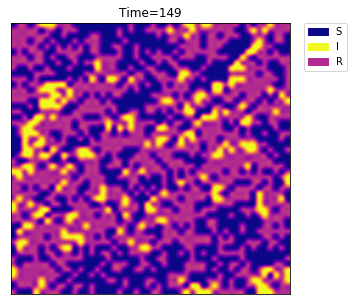

In [21]:
# %matplotlib inline                # uncomment this if you run DynamicPlot fn after any fn below this fn
                                    # or just restart kernel and do again
sir_model.DynamicPlot(150)

#### Initilisation Model 2 (Phase Diagram & Variance)

In [8]:
N           = 20                            # lattice size
p1, p2, p3  = 0.05, 0.5, 0.0                # p for visualisation, 
S0, I0, R0  = 0.05, 0.9, 0.05               # initial fraction of S, I, R
equistep    = 100                           # equilibrate sweep
calcstep    = 20000                         # measurement sweep    [p/s: change to 10000 for faster]
factor      = int(calcstep/10)              # because of 'if (j%10 == 0):' in 'analyse' fn

p = [p1, p2, p3]
fraction = [S0, I0, R0]

np.random.seed(0)
sir_model = ca_utils_cy.SIR(N, fraction, p, factor, equistep, calcstep)

- Method behavior
    - Phase Diagram of SIR model
    - Variance, < $\psi$ >

<IPython.core.display.Javascript object>


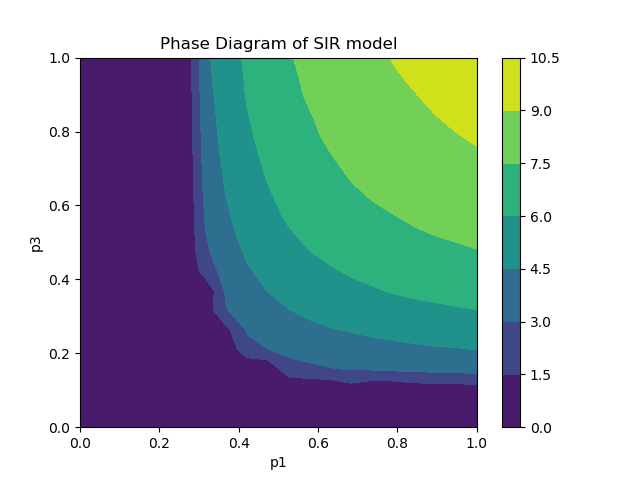

In [9]:
%matplotlib notebook
sir_model.phaseDiagram()

<IPython.core.display.Javascript object>


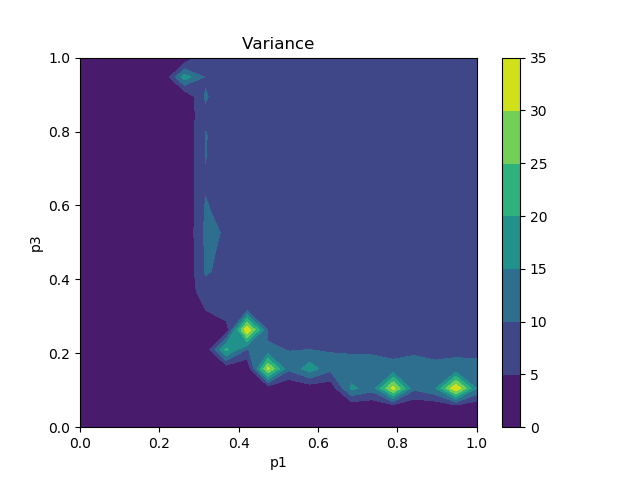

In [10]:
%matplotlib notebook
sir_model.variance()

#### Initilisation Model 2 (Cut for Wave Variance)

In [7]:
N           = 20                            # lattice size
p1, p2, p3  = 0.05, 0.5, 0.5                # p for visualisation
S0, I0, R0  = 0.5, 0.3, 0.2                 # initial fraction of S, I, R
equistep    = 100                           # equilibrate sweep
calcstep    = 20000                         # measurement sweep
factor      = int(calcstep/10)              # because of 'if (j%10 == 0):' in 'analyse' fn

p = [p1, p2, p3]
fraction = [S0, I0, R0]

np.random.seed(0)
sir_model_2 = ca_utils_cy.SIR(N, fraction, p, factor, equistep, calcstep)

- Method behavior
    - Cut for Wave Variance
    - Wave cut observed to be for p1 > ~0.15 with p2, p3 = 0.5

<IPython.core.display.Javascript object>


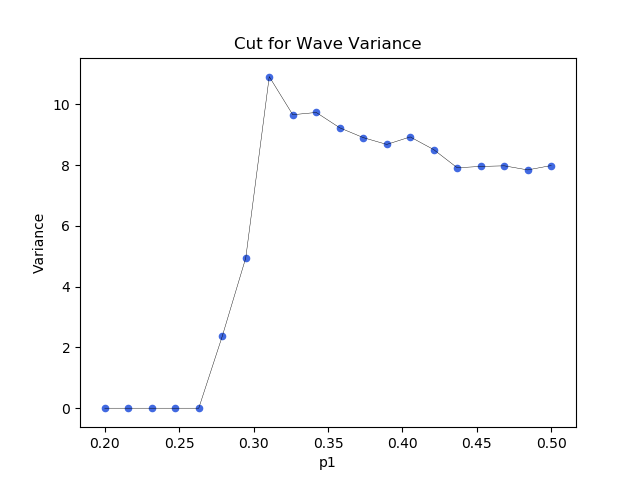

In [8]:
%matplotlib notebook
p1_range     = np.linspace(0.2, 0.5, N)
sir_model_2.cutVariance(p1_range)

#### Initilisation Model 3 (Infected Fraction vs Immune Fraction)

In [13]:
N           = 20                            # lattice size
p1, p2, p3  = 0.5, 0.5, 0.5                 # p for visualisation
S0, I0, R0  = 0.1, 0.4, 0.5                 # initial fraction of S, I, R
equistep    = 100                           # equilibrate sweep
calcstep    = 20000                         # measurement sweep
factor      = int(calcstep/10)              # because of 'if (j%10 == 0):' in 'analyse' fn

p = [p1, p2, p3]
fraction = [S0, I0, R0]

np.random.seed(0)
sir_model_3 = ca_utils_cy.SIR(N, fraction, p, factor, equistep, calcstep)

- Method behavior
    - Average Infected fraction $\frac{<I>}{N}$ vs Fraction of Immunity, $f_{im}$
    - Immune fraction of at least 0.35 is required to stop the spreading of the infection

<IPython.core.display.Javascript object>


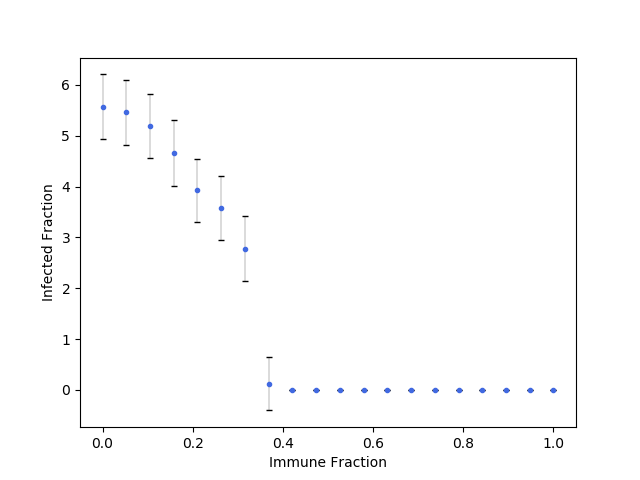

In [14]:
%matplotlib notebook
sir_model_3.compare_infected_immune()